# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Data

In [2]:
data = load_breast_cancer()
X = data['data']
y = data['target']
feature_names = data['feature_names']
X.shape, y.shape

((569, 30), (569,))

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
pca = PCA()
pca_fit = pca.fit(X)

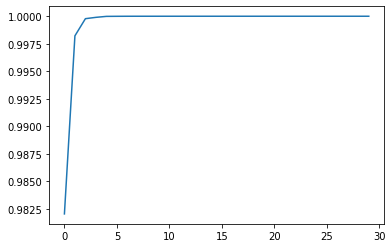

In [5]:
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))

In [6]:
np.cumsum(pca_fit.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [9]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
print(f'Accuracy : {cross_val_score(log_reg, X, y, cv=5).mean():.2%}')

Accuracy : 97.89%


In [11]:
log_reg = make_pipeline(StandardScaler(), PCA(10), LogisticRegression(solver='lbfgs'))
print(f'Accuracy : {cross_val_score(log_reg, X, y, cv=5).mean():.2%}')

Accuracy : 97.89%


In [15]:
# Cs provides a faster tuning for C than Grid Search or Randomized Grid Search
log_reg = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=100, solver='lbfgs', cv=5))
print(f'Accuracy : {cross_val_score(log_reg, X, y, cv=5).mean():.2%}')

/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imad/anaconda3/envs/ml-zoo/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

Accuracy : 98.07%


In [10]:
# Cs provides a faster tuning for C than Grid Search or Randomized Grid Search
log_reg = make_pipeline(StandardScaler(), PCA(10), LogisticRegressionCV(Cs=100))
print(f'Accuracy : {cross_val_score(log_reg, X, y).mean():.2%}')

Accuracy : 97.89%


In [11]:
# Using Stochastic average gradient descent solver 'sag' makes it faster on large data
log_reg = make_pipeline(StandardScaler(), PCA(10), LogisticRegressionCV(Cs=100, solver='sag'))
print(f'Accuracy : {cross_val_score(log_reg, X, y).mean():.2%}')

C:\Users\e739218\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\e739218\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\e739218\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy : 97.89%


In [19]:
np.bincount(y) / y.size

array([0.37258348, 0.62741652])

In [20]:
# Using class weight allows use to overcome imbalanced data
log_reg = make_pipeline(StandardScaler(), PCA(10), LogisticRegressionCV(Cs=100, class_weight='balanced'))
print(f'Accuracy : {cross_val_score(log_reg, X, y).mean():.2%}')

Accuracy : 97.01%
